Graph question is one of the most popular type of question in hackerrank. The questions provide your a graph (Usually in form of a set of vectors and edges.) and ask you to solve some questions about it. What is the typical process? Here is an example:

There is n nodes and the edges set E. What is the size largest cluter?

In [124]:

nodes=['A','B','C','D','E','F','G']
edges=[('C','B'), ('B','A'), ('C','A'), ('E', 'D'),('A','F')]



Let's show the graph first

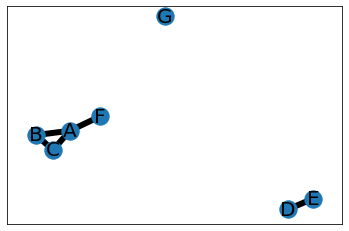

In [103]:
import networkx as nx
import matplotlib.pyplot as plt
def drawNetwork(V,E):
    G = nx.Graph()
    G.add_nodes_from(V)
    G.add_edges_from(E)
    pos = nx.spring_layout(G, seed=1) 
    nx.draw_networkx_nodes(G, pos, node_size=300)
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    nx.draw_networkx_edges(G, pos,  width=6)
drawNetwork(nodes,edges)

Obversely, the size of largest cluster is 4 (node A,B,C,F). but how to get this 4?

For convinient.Lets convert all nodes to node 0, node 1....node N

In [126]:


nodesToVDict={v:e for e,v in enumerate(nodes)}
VTonodeDict={e:v for e,v in enumerate(nodes)}
V=[nodesToVDict[n] for n in nodes]
E=[(nodesToVDict[n1],nodesToVDict[n2] ) for n1,n2 in edges]

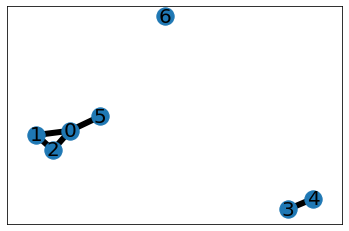

In [127]:
drawNetwork(V,E)

Then, convert the edges to a Adjacency matrix ( https://en.wikipedia.org/wiki/Adjacency_matrix ). Adjacency matrix can show the neighbor of nodes much more clearer than the edge set. It is very useful for the following process. You dont have to loop though the entire edge list to find the neighbors, Especially if the graph is very dense, adjacency matrix helps you reduce a lot of the complexity. 


In [108]:
adj=[[] for _ in V]
for n1,n2 in E:
    adj[n1].append(n2)
    adj[n2].append(n1)
print('Adjacency matrix',adj)

def findNeighborWithAdjMartrix(target):
    return adj[target]
print('The neighbor of node 1:',findNeighborWithAdjMartrix(1))

Adjacency matrix [[1, 2, 5], [2, 0], [1, 0], [4], [3], [0], []]
The neighbor of node 1: [2, 0]


As comparing, let's loop though the entire list to find the neighbors of node 1: we can see we have to loop the list of edges everytime. If we want to know all neighbors of every node. It is a O(EV) vs O(E+V)

In [111]:


def findNeighborWithEdgeList(target):
    neighbors=[]
    for n1,n2 in E:
        if n1==target:
            neighbors.append(n2)
        if n2==target:
            neighbors.append(n1)
    return neighbors

print('The neighbor of node 1:',findNeighborWithEdgeList(1))

The neighbor of node 1: [2, 0]


Now let's write a recursive function to find the size of each cluster.
Firstly lets mark all node with a False label. If the label is False, that means the node has been not yet assigned to any cluster.

The idea of the function is 'the size of cluster of node n=1 (node n itself) +size of cluster(s) of all neighbors'. From this idea, using a recursive function is suitable method.

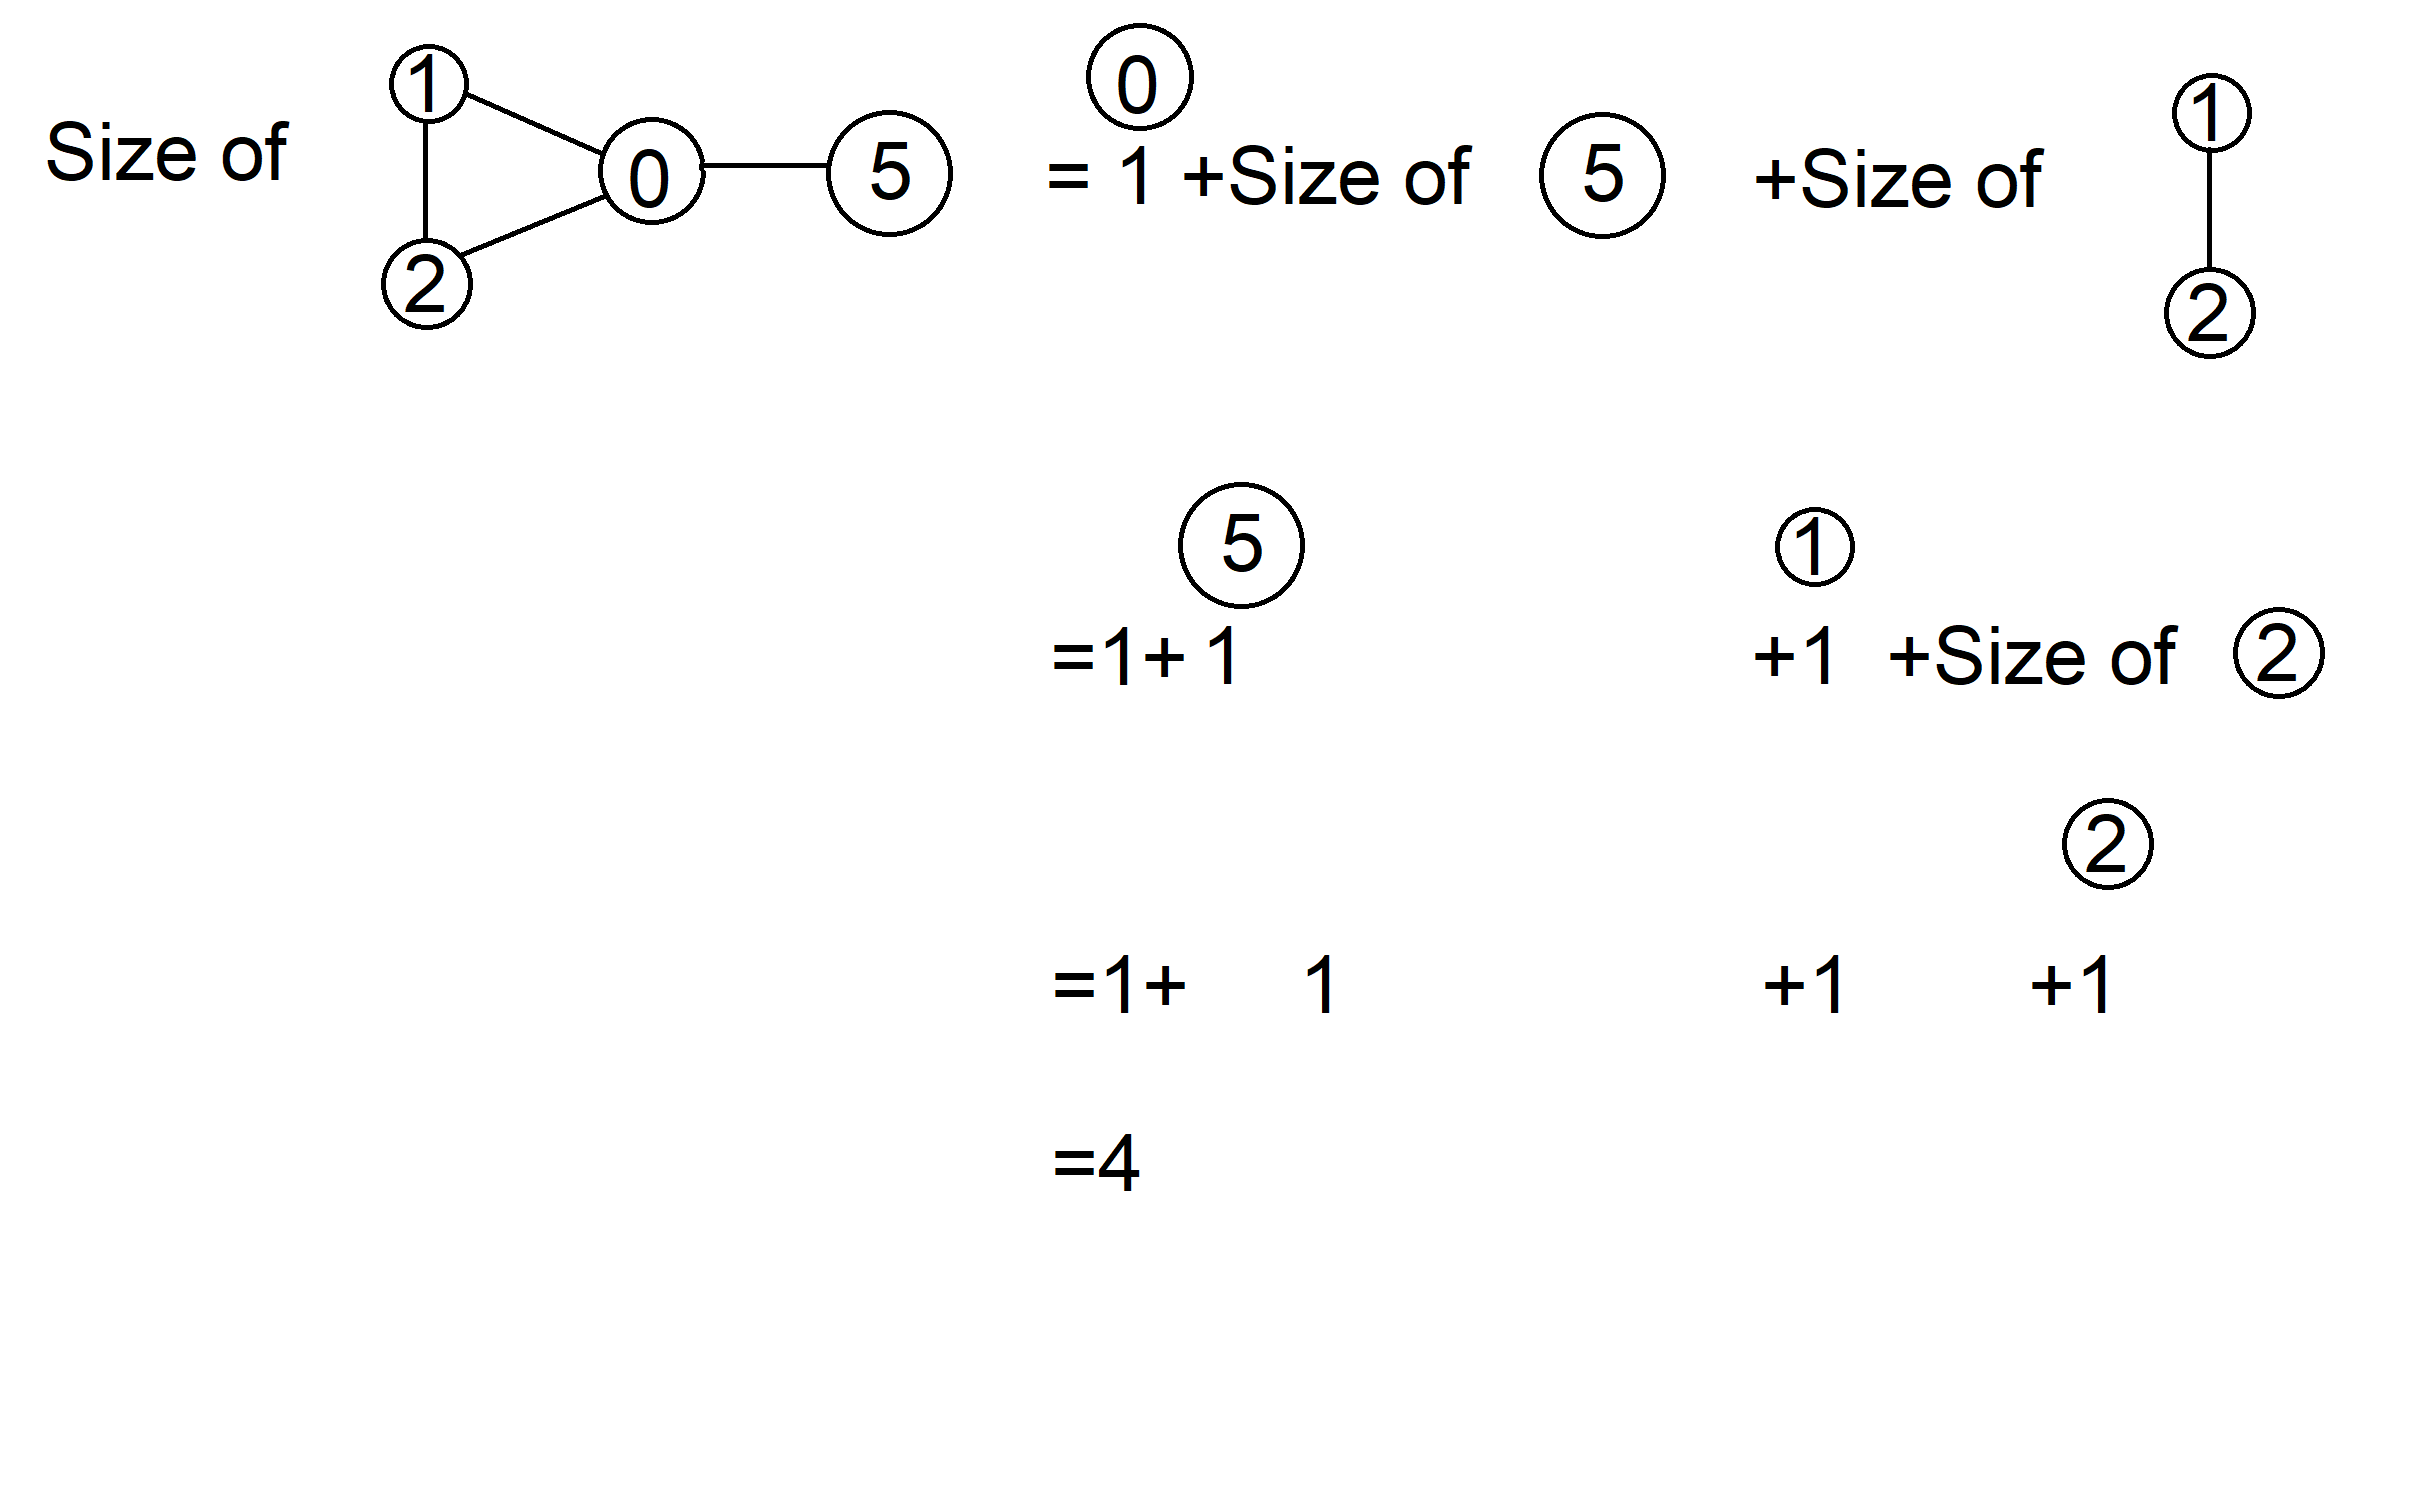

In [139]:
#store the size of cluster. The key is the node with smallest label in the cluster
clusterSize={}

#recurcive version
marked=[False for _ in V]
def getSizeOfNode(node):
    if marked[node]:
        return 0
    marked[node]=True
    size=1
    for neighbor in adj[node]:
        if marked[neighbor]:
            continue
        else:
            size+=getSizeOfNode(neighbor)
    return size

for i in V:
    size=getSizeOfNode(i)
    if size>0:
        clusterSize[i]=size
for cluster,size in clusterSize.items():
    print('Cluster',cluster,'size:',size)
print('-'*10)
print('Largest size is',max([size for cluster,size in clusterSize.items()]))

Cluster 0 size: 4
Cluster 3 size: 2
Cluster 6 size: 1
----------
Largest size is 4


OK we have got the answer, but how about the question asking us what the largest cluster was? Just make a few change of the function. Add a dict to store the nodes in the cluster.

In [137]:
#store the size of cluster. The key is the node with smallest label in the cluster
clusterSize={}
#store the cluster. The key is the node with smallest label in the cluster
clusters={n:[] for n in V}

#The node haven't been assigned to a cluster
marked=[False for _ in V]
#recurcive function
def getSizeOfNodeAndRecondTheCluster(node,seedOfCluster):
    if marked[node]:
        return 0
    marked[node]=True
    #############Assign the current node to the cluster#####################
    
    clusters[seedOfCluster].append(node)
    #######################################################################
    size=1
    for neighbor in adj[node]:
        if marked[neighbor]:
            continue
        else:
            size+=getSizeOfNode(neighbor,seedOfCluster)
    return size

for node in V:
    size=getSizeOfNodeAndRecondTheCluster(node,node)
    
    if size>0:
        clusterSize[node]=size
for cluster,nodes in clusters.items():
    if len(nodes)>0:
        print('Cluster seed', cluster,' with nodes:', nodes)

print('-'*10)
seedOfLargestCluster=max(clusterSize, key=clusterSize.get)# max([size for cluster,size in clusterSize.items()])

print('Largest cluster is cluster',seedOfLargestCluster,'with nodes',clusters[seedOfLargestCluster],'. The size is',clusterSize[seedOfLargestCluster])

Cluster seed 0  with nodes: [0, 1, 2, 5]
Cluster seed 3  with nodes: [3, 4]
Cluster seed 6  with nodes: [6]
----------
Largest cluster is cluster 0 with nodes [0, 1, 2, 5] . The size is 4


# Non recursive version

Something the graph is very larger that the function exceedes the limit of stack. So we need a non recursive version

In [138]:
#store the size of cluster. The key is the node with smallest label in the cluster
clusterSize={}
#store the cluster. The key is the node with smallest label in the cluster
clusters={n:[] for n in V}
#The node haven't been assigned to a cluster
marked=[False for _ in V]
#Non recurcive version
def getSizeOfNodeAndRecondTheClusterNonRecurcive(seedOfCluster):
    if marked[seedOfCluster]:
        return 0
    #############Assign the current node to the cluster#####################
    clusters[seedOfCluster].append(seedOfCluster)
    #######################################################################
    size=1
    nodeInTheSameClusterNotYetCheck=set()
    nodeInTheSameClusterNotYetCheck.add(seedOfCluster)
    marked[seedOfCluster]=True
    while len(nodeInTheSameClusterNotYetCheck)>0:
        node=nodeInTheSameClusterNotYetCheck.pop()
        for neighbor in adj[node]:
            if marked[neighbor]:
                continue
            else:
                nodeInTheSameClusterNotYetCheck.add(neighbor)
                clusters[seedOfCluster].append(neighbor)
                marked[neighbor]=True

                size+=1
    return size

for node in V:
    size=getSizeOfNodeAndRecondTheClusterNonRecurcive(node)
    
    if size>0:
        clusterSize[node]=size
for cluster,nodes in clusters.items():
    if len(nodes)>0:
        print('Cluster seed', cluster,' with nodes:', nodes)

print('-'*10)
seedOfLargestCluster=max(clusterSize, key=clusterSize.get)# max([size for cluster,size in clusterSize.items()])

print('Largest cluster is cluster',seedOfLargestCluster,'with nodes',clusters[seedOfLargestCluster],'. The size is',clusterSize[seedOfLargestCluster])

Cluster seed 0  with nodes: [0, 1, 2, 5]
Cluster seed 3  with nodes: [3, 4]
Cluster seed 6  with nodes: [6]
----------
Largest cluster is cluster 0 with nodes [0, 1, 2, 5] . The size is 4
